In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

# model selection
from sklearn.ensemble import RandomForestClassifier

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [26]:
df = pd.read_csv('AS24_Case_Study_Data.csv', delimiter=";")
df.head()

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224


In [8]:
df['product_tier'].value_counts()

Basic      75421
Premium     2324
Plus         576
Name: product_tier, dtype: int64

In [27]:
df.columns

Index(['article_id', 'product_tier', 'make_name', 'price', 'first_zip_digit',
       'first_registration_year', 'created_date', 'deleted_date',
       'search_views', 'detail_views', 'stock_days', 'ctr'],
      dtype='object')

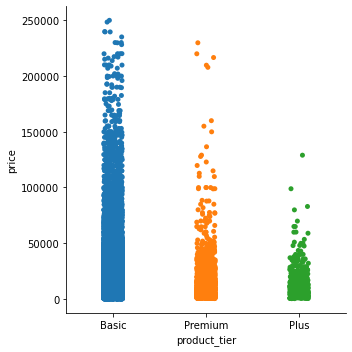

In [28]:
sns.catplot(x = 'product_tier', y = 'price', data = df)

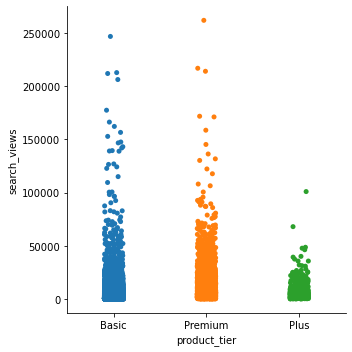

In [29]:
sns.catplot(x = 'product_tier', y = 'search_views', data = df.query("search_views < 300000"))

In [30]:
# correlation_mat = df.corr()

# sns.heatmap(correlation_mat, annot = True)

# plt.title("Correlation matrix of Breast Cancer data", y=-0.75)

# plt.xlabel("features")

# plt.ylabel("features")

# plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


In [55]:
X = df.drop(['article_id', 'product_tier', 'first_zip_digit', 'created_date', 'deleted_date', 'make_name', 'first_registration_year', "ctr"], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         78321 non-null  int64  
 1   search_views  78311 non-null  float64
 2   detail_views  78311 non-null  float64
 3   stock_days    78321 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 2.4 MB


In [67]:
df.dropna(inplace = True)

In [68]:
X.head(11)

,price,search_views,detail_views,stock_days
0,16750,3091.0,123.0,30
1,35950,3283.0,223.0,52
2,11950,3247.0,265.0,51
3,1750,1856.0,26.0,101
4,26500,490.0,20.0,12
5,24890,125.0,6.0,2
6,2850,172.0,4.0,1
7,23740,1499.0,99.0,87
8,7850,4329.0,133.0,75
9,13950,2257.0,89.0,32


In [69]:
df['product_tier'].value_counts()

0    75397
2     2324
1      576
Name: product_tier, dtype: int64

In [70]:
le = LabelEncoder()
df['product_tier'] = le.fit_transform(df['product_tier'])
df['product_tier'].value_counts()

0    75397
2     2324
1      576
Name: product_tier, dtype: int64

In [71]:
y = df['product_tier']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [78321, 78297]

### to deal with imbalanced classification data
we can see that the data is very imbalanced (towards basic tier).
Without balancing, the model will overfit "Basic" tier and underfit "Plus" tier.
#### need to balance the data. We will be using imblearn.

In [73]:
from imblearn.under_sampling import RandomUnderSampler

In [50]:
conda install -c glemaitre imbalanced-learn

Solving environment: | ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [74]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

In [75]:
pd_y = pd.Series(y_resampled)
pd_y.value_counts()

2    468
1    468
0    468
Name: product_tier, dtype: int64

In [76]:
sc = StandardScaler()
X_resampled = sc.fit_transform(X_resampled)
X_test = sc.transform(X_test)

In [77]:
X_resampled.shape

(1404, 4)

# Different Model Fitting

## RandomForestClassifier

In [78]:
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
pred_rfc = rfc.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# Metrics Evaluation

In [1]:
# RandomForestClassifier
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
# sns.heatmap(confusion_matrix(y_test, pred_rfc)) # not of much use since num data is skewed

NameError: name 'accuracy_score' is not defined

In [25]:


red   : 4/17 
green : 13/17
    
impurity = 1 - red**2 - green**2  : x 

    x = .2
# red : 17/17
#green : 0/17 
    
impurity = 0

##########

Information gain :
    
new_impurity from new subdatasets


new_impurity = .1

Information gain = impurity - new_impurity  = .1


keep splitting until Information gain < 0, ir does not mean that the sub dataset has impurity =0

in final split : which category is the majority: the leaf will be labelled as that paricular label: THE LEAF
            
            

            
20 white wine:
    
    ## Tree 1: predicts : 18 white
    ## Tree 2:   : 12 white
    conclusion: tree 1 is better
        

        
        
20 red wines:
    ## tree 1 : 12 red
    ## tree 2: 16 red wines
    
    conclusion : tree 2 is better
        
        
        
best make 100 trees:
    
    majority vote: 
        










SyntaxError: invalid syntax (<ipython-input-25-2201b43734a1>, line 4)